In [1]:
import matplotlib.pyplot as plt
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [2]:
import phoebe
import numpy as np

logger = phoebe.logger('error')

In [3]:
b=phoebe.default_binary()

In [4]:

# For setting mass instead of sma
b.flip_constraint(qualifier='mass',component='primary',solve_for='sma')

<ConstraintParameter: {sma@binary@component} = (((({mass@primary@component} * ({period@binary@component} ** 2.000000)) * ({q@binary@component} + 1.000000)) * 2942.206217504419328179210424423218) / 39.478418) ** (1./3) (solar units) => 5.299999999999999 solRad>

### Paper: Discovery of β Cep pulsations in the eclipsing binary V453 Cygni [doi:10.1093/mnrasl/slaa091]

![https://github.com/Vysakh13579/FITTING_BINARIES/blob/85a643457cd860a495f999754a7afb6de2fc7ea5/parameters.png](https://github.com/Vysakh13579/FITTING_BINARIES/blob/85a643457cd860a495f999754a7afb6de2fc7ea5/parameters.png 'Title' )

In [5]:
b['requiv@primary@component']=8.665
b['requiv@secondary@component']=5.250

b['gravb_bol@primary@component']=1
b['gravb_bol@secondary@component']=1

b['teff@primary@component']=28800
b['teff@secondary@component']=27700

b['mass@primary@component']=13.96

b['period@binary@component']= 3.889
b['per0@binary@component']=152.5
b['ecc@binary@component']=0.025
b['incl@binary@component']=86.14
b['q@binary@component']=0.795

In [ ]:
lctimes=phoebe.linspace(0,19.4,501)
rvtimes=phoebe.linspace(0,19.4,101)
b.add_dataset('lc', times=lctimes, dataset='lc01',overwrite=True)
b.add_dataset('rv', times=rvtimes, dataset='rv01',overwrite=True)

<ParameterSet: 50 parameters | contexts: figure, constraint, compute, dataset>

### As the above did not have limb darkening values, I refered to the previous paper by the same author
[doi:10.1093/mnras/sty2516]

![https://github.com/Vysakh13579/FITTING_BINARIES/blob/85a643457cd860a495f999754a7afb6de2fc7ea5/param2.png](https://github.com/Vysakh13579/FITTING_BINARIES/blob/85a643457cd860a495f999754a7afb6de2fc7ea5/param2.png "Title")

In [20]:
b.set_value_all(qualifier='ld_mode', value='manual')
b.set_value_all(qualifier='ld_func', value='linear')
b.set_value_all(qualifier='ld_coeffs', component='primary', value=0.369)
b.set_value_all(qualifier='ld_coeffs', component='secondary', value=0.268)

In [21]:
b.set_value_all('ld_mode_bol', 'manual')
b.set_value_all('ld_func_bol','linear')
b.set_value('ld_coeffs_bol@primary@component',0.585)
b.set_value('ld_coeffs_bol@secondary@component',0.630)
b.set_value('irrad_frac_refl_bol@primary@component',1)
b.set_value('irrad_frac_refl_bol@secondary@component',1)

In [22]:
print(b.run_checks())

Run Checks Report: PASS



In [23]:
b.add_compute('ellc', compute='fastcompute',overwrite=True)
b.run_compute(compute='fastcompute')

fluxes = b.get_value('fluxes@model') + np.random.normal(size=lctimes.shape) * 0.01
fsigmas = np.ones_like(lctimes) * 0.02

rvsA = b.get_value('rvs@primary@model') + np.random.normal(size=rvtimes.shape) * 10
rvsB = b.get_value('rvs@secondary@model') + np.random.normal(size=rvtimes.shape) * 10
rvsigmas = np.ones_like(rvtimes) * 20

100%|█████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 10.97it/s]


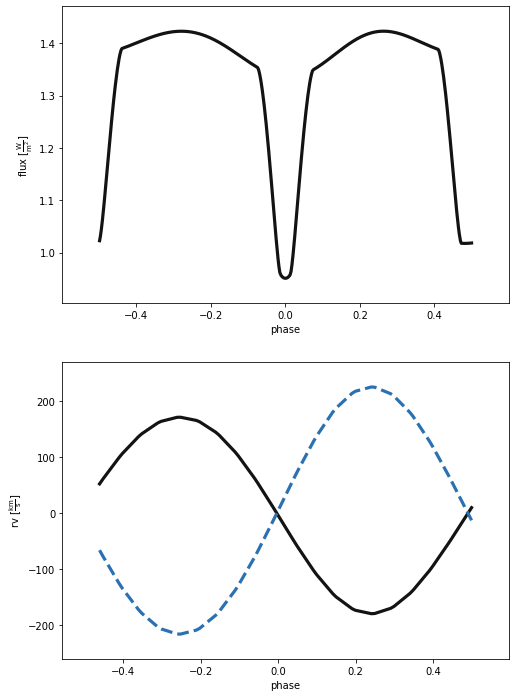

(<autofig.figure.Figure | 2 axes | 3 call(s)>,
 <Figure size 576x864 with 2 Axes>)

In [24]:
b.plot(x='phases',show=True)

### Plots from published papers(2020,2018 respectively)

![https://github.com/Vysakh13579/FITTING_BINARIES/blob/85a643457cd860a495f999754a7afb6de2fc7ea5/curve.png](https://github.com/Vysakh13579/FITTING_BINARIES/blob/85a643457cd860a495f999754a7afb6de2fc7ea5/curve.png "Title")
![https://github.com/Vysakh13579/FITTING_BINARIES/blob/85a643457cd860a495f999754a7afb6de2fc7ea5/curve2.png](https://github.com/Vysakh13579/FITTING_BINARIES/blob/85a643457cd860a495f999754a7afb6de2fc7ea5/curve2.png "Title")